# Punto 1
Para hallar la impedancia iterativa no dependo de la carga que quiero ver?<br>
Entiendo que la impedancia iterativa es aquella con la cual se carga el cuadripolo de forma tal de que a la entrada se ve esa impedancia.<br>
Podria asumir una carga $R=1\Omega$ para calcular.<br>
En pricipio lo planteo generico entonces:<br>
Me interesa ver la carga $R_{it}$ en la entrada$\rightarrow$
<img src="./Rit.PNG" align="center" width="80%" />
$$R_{it}=Z_{1}+\frac{(Z_3+R_{it})*Z_2}{Z_3+R_{it}+Z_2}$$
$$\rightarrow R_{it}=\frac{Z_1-Z_3}{2}+\sqrt{\frac{(Z_3-Z_1)^2}{4}+(Z_1Z_3+Z_1Z_2+Z_3Z_2)}$$
La impedancia imagen la puedo definir como:
$$Z_{i1}=\sqrt{\frac{AB}{CD}}$$
$$Z_{i2}=\sqrt{\frac{DB}{CA}}$$
Y la impedancia caracteristica simplemente con la condicion de que$Z_{i1}=Z_{i2}\rightarrow$...
$$Z_o=\sqrt{\frac{B}{C}}$$
<u>Recordando la matriz T de una L-invertida:<u>
    $$T=\begin{bmatrix}
1+ ZY & Z\\
Y     & 1
\end{bmatrix}$$

In [1]:
from scipy import signal
from sympy import *
import matplotlib.pyplot as plt
import math as m
from splane import pzmap, grpDelay, bodePlot
import numpy as np

S, L, C=symbols('S L C')

T_Linvertida=Matrix(([1+S*L*S*C,S*L],
                     [S*C,1]))
print("La matriz T de la L invertida es:")
pprint(T_Linvertida)
print("Reemplazando los valores y haciendo las cuentas para la Zi1 y la Zi2...")
T_Linvertida_valores=Matrix(([1+S*1*S*1,S*1],
                     [S*1,1]))
Zi1_a=sqrt((T_Linvertida_valores[0]*T_Linvertida_valores[1])/(T_Linvertida_valores[2]*T_Linvertida_valores[3]))
print("Zi1=")
pprint(Zi1_a)

Zi2_a=sqrt((T_Linvertida_valores[3]*T_Linvertida_valores[1])/(T_Linvertida_valores[2]*T_Linvertida_valores[0]))
print("Zi2=")
pprint(Zi2_a)

La matriz T de la L invertida es:
⎡     2         ⎤
⎢C⋅L⋅S  + 1  L⋅S⎥
⎢               ⎥
⎣   C⋅S       1 ⎦
Reemplazando los valores y haciendo las cuentas para la Zi1 y la Zi2...
Zi1=
   ________
  ╱  2     
╲╱  S  + 1 
Zi2=
     ________
    ╱   1    
   ╱  ────── 
  ╱    2     
╲╱    S  + 1 


No tiene sentido pensar en la Z caracteristica de la L invertida ya que no podria hacer iguales sus Z imagen.<br>
Paso directamente a las Z del B)<br>
La matriz T del punto B por comidad lo voy a hallar como una L invertida en cascada con una impedancia serie.<br>
$$T=\begin{bmatrix}
1+ ZY & Z\\
Y     & 1
\end{bmatrix}
*
\begin{bmatrix}
1 & Z\\
0     & 1
\end{bmatrix}$$

In [2]:
T_Linvertida_2=Matrix(([1+S*1*S*2,S*1],
                     [S*2,1]))
print("La matriz T de la L invertida es:")
pprint(T_Linvertida_2)
T_Zserie=Matrix(([1,S*1],
                 [0,1]))
print("La matriz T de la Z serie es:")
pprint(T_Zserie)

T_Total=T_Linvertida_2*T_Zserie
print("La T total es:")
pprint(T_Total)

Zi1_b=sqrt((T_Total[0]*T_Total[1])/(T_Total[2]*T_Total[3]))
print("Zi1=")
pprint(Zi1_b)

Zi2_b=sqrt((T_Total[3]*T_Total[1])/(T_Total[2]*T_Total[0]))
print("Zi2=")
pprint(Zi2_b)

print("Es claro que al ser un Pasa bajos K-cte tiene Zi1=Zi2")
Z_0=sqrt(T_Total[1]/T_Total[2])
print("Z0 es:")
pprint(Z_0)

La matriz T de la L invertida es:
⎡   2       ⎤
⎢2⋅S  + 1  S⎥
⎢           ⎥
⎣  2⋅S     1⎦
La matriz T de la Z serie es:
⎡1  S⎤
⎢    ⎥
⎣0  1⎦
La T total es:
⎡   2        ⎛   2    ⎞    ⎤
⎢2⋅S  + 1  S⋅⎝2⋅S  + 1⎠ + S⎥
⎢                          ⎥
⎢                 2        ⎥
⎣  2⋅S         2⋅S  + 1    ⎦
Zi1=
        __________________
       ╱   ⎛   2    ⎞     
      ╱  S⋅⎝2⋅S  + 1⎠ + S 
√2⋅  ╱   ──────────────── 
   ╲╱           S         
──────────────────────────
            2             
Zi2=
        __________________
       ╱   ⎛   2    ⎞     
      ╱  S⋅⎝2⋅S  + 1⎠ + S 
√2⋅  ╱   ──────────────── 
   ╲╱           S         
──────────────────────────
            2             
Es claro que al ser un Pasa bajos K-cte tiene Zi1=Zi2
Z0 es:
        __________________
       ╱   ⎛   2    ⎞     
      ╱  S⋅⎝2⋅S  + 1⎠ + S 
√2⋅  ╱   ──────────────── 
   ╲╱           S         
──────────────────────────
            2             


La consigna es medio capciosa me parece poco clara. No dice nada de maxima planicidad ni si los 0 db son respecto de Vg o la Vin del cuadripolo...<br>
Asi como esta la red funciona solo faltaria desnormalizar...<br>
Se podria agregar una celda adaptadora m=0,6 para adaptar mejor, pero estariamos agregando un cero de tx en 1,25 Ghz.<br>

A continuacion solo desnormalizo y agrego simulaciones de ser necesario se haran updates...<br>

In [3]:
##########Constantes de Desnormalizacion#############
N_z=50
N_w=1*10**9 *2*m.pi
#N_w=1
####Vector de resistencias Normalizadas#############
#####Se debe inicializar con los valores de tus resistencias########
R_n=[1]

####Vector de resistencias Desnormalizadas##########
R=[]
for i in range(len(R_n)):
    
    R.append(R_n[i]*N_z)
    print('R[',i+1,'] valia',R_n[i],'=>',R[i])

####Vector de capacitores Normalizados#############
#####Se debe inicializar con los valores de tus capacitores########
C_n=[2]

####Vector de Capacitores Desnormalizados##########

C=[]
for i in range(len(C_n)):
    C.append(C_n[i]/N_z / N_w)
    print('C[',i+1,'] valia',C_n[i],'=>',C[i])

####Vector de inductores Normalizados#############
#####Se debe inicializar con los valores de tus inductores########
L_n=[1]

####Vector de inductores Desnormalizados##########

L=[]
for i in range(len(L_n)):
    L.append(L_n[i]*N_z/N_w)
    print('L[',i+1,'] valia',L_n[i],'=>',L[i])

R[ 1 ] valia 1 => 50
C[ 1 ] valia 2 => 6.3661977236758135e-12
L[ 1 ] valia 1 => 7.957747154594767e-09


<img src="./AC trafer Vin1.PNG" align="center" width="100%" />
<img src="./circuito 1.PNG" align="center" width="80%" />


# Punto 2)
Se nos pide un pasabanda "simetrico"(Me refiero a que es igualmente estricto para ambas bandas detenidas) por eso diseño apartir de la frecuencia superior y luego lo paso por un nucleo de transformacion.<br>
Primero pasamos los dB/octava a dB/Decada(Because it painted!)<br>
Regla de 3:<br>
$$\log(2)=0.3 \rightarrow 6dB$$
$$\log(10)=1 \rightarrow X$$
Entonces $X=20dB/Dec$ esto nos indicaria que con un pasabajos orden 1 seria suficiente...<br>
Encaro un butter.<br>
Armo una plantilla normalizada:<br>

In [4]:
print("Verifico el epsilon y con el epsilon el N")
alpha_max=20*log(sqrt(1+1))#se sustituyo epsilon=1
print("alpha_max con epsilon=1")
pprint(alpha_max)
alpha_min=20*log(sqrt(1+10**(2*1)))
print("alpha min con N=1")
pprint(alpha_min)

Verifico el epsilon y con el epsilon el N
alpha_max con epsilon=1
20⋅log(√2)
alpha min con N=1
20⋅log(√101)


Visto que las verificaciones dan bien el polinomio debe ser:
$$T_{(S)}=\frac{1}{S+1}$$
y el nucleo de transformacion debe ser:
$$W_o^2=W_1*W_2$$
$$B=W_2-W_1$$
$$S=\frac{W_o}{B}*\frac{S^2 + W_o^2}{W_oS}$$

Wo^2= 1000000 Lo vamos a usar para hacer las cuentas normalizadas
T(S)=
                     S                      
────────────────────────────────────────────
                   2                        
0.101010101010101⋅S  + S + 0.101010101010101


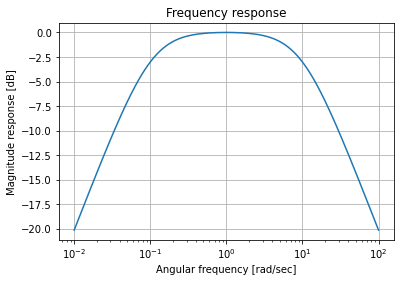

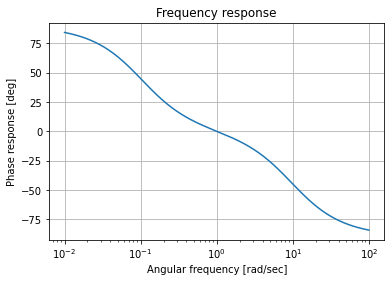

In [15]:
Wo_cuadrado=100*10*10**3
print("Wo^2=",Wo_cuadrado,"Lo vamos a usar para hacer las cuentas normalizadas")
Wo=1
B=10-0.1
T_S=1/((Wo/B*(S**2 +Wo**2)/(Wo*S))+1)
print("T(S)=")
pprint(simplify(T_S))
num1=[1,0]
den1=[10/99,1,10/99]
Sys1=signal.TransferFunction(num1,den1)
bodePlot(Sys1)

<img src="./circuito 2.PNG" align="center" width="80%" />
<img src="./AC tranfer 2.PNG" align="center" width="100%" />

In [9]:
##########Constantes de Desnormalizacion#############
N_z=10**3
N_w=1*10**3 *2*m.pi
#N_w=1
####Vector de resistencias Normalizadas#############
#####Se debe inicializar con los valores de tus resistencias########
R_n=[10/99]

####Vector de resistencias Desnormalizadas##########
R=[]
for i in range(len(R_n)):
    
    R.append(R_n[i]*N_z)
    print('R[',i+1,'] valia',R_n[i],'=>',R[i])

####Vector de capacitores Normalizados#############
#####Se debe inicializar con los valores de tus capacitores########
C_n=[1]

####Vector de Capacitores Desnormalizados##########

C=[]
for i in range(len(C_n)):
    C.append(C_n[i]/N_z / N_w)
    print('C[',i+1,'] valia',C_n[i],'=>',C[i])

####Vector de inductores Normalizados#############
#####Se debe inicializar con los valores de tus inductores########
L_n=[1]

####Vector de inductores Desnormalizados##########

L=[]
for i in range(len(L_n)):
    L.append(L_n[i]*N_z/N_w)
    print('L[',i+1,'] valia',L_n[i],'=>',L[i])

R[ 1 ] valia 0.10101010101010101 => 101.01010101010101
C[ 1 ] valia 1 => 1.5915494309189535e-07
L[ 1 ] valia 1 => 0.15915494309189535


<img src="./circuito 2 des.PNG" align="center" width="80%" />
<img src="./AC tranfer des 2.PNG" align="center" width="100%" />
<img src="./circuito 2 gain.PNG" align="center" width="80%" />
<img src="./AC tranfer 2 gain.PNG" align="center" width="100%" />
<br>

# Punto3

## a) el de la derecha es un pasa todo el de la izq es un pasa banda, verificamos si es notch porque le faltan coeficientes.
$$\lvert{S_{11}(jw)}\rvert^2+\lvert{S_{21}(jw)}\rvert^2=1$$

Modulo de S11 al cuadrado=
  4    2     
 W  + W  + 1 
─────────────
 4      2    
W  + 2⋅W  + 1
S11(S)*S11(-S)=
  4    2     
 S  - S  + 1 
─────────────
 4      2    
S  - 2⋅S  + 1
    4    2       
   S  - S  + 1   
─────────────────
       2        2
(S - 1) ⋅(S + 1) 
 4    2    
S  - S  + 1


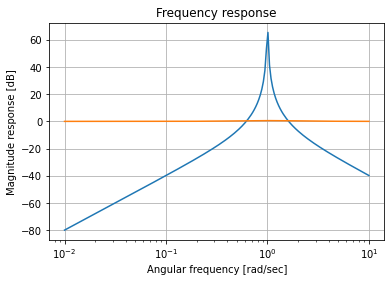

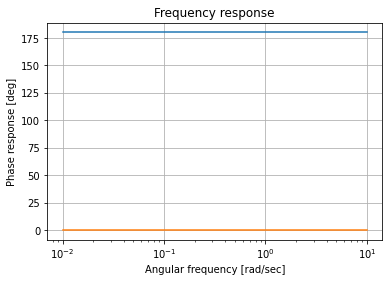

In [29]:
num2=[1,0,0]
den2=[1,0,2,0,1]
Sys2=signal.TransferFunction(num2,den2)
bodePlot(Sys2)
num3=[1,0,-2,0,1]
den3=[1,0,-7/4,0,1]
Sys3=signal.TransferFunction(num3,den3)
bodePlot(Sys3)
W=symbols('W')
S21=W**2/(W**4 +2*W**2 +1)
S11=1-S21
print("Modulo de S11 al cuadrado=")
pprint(simplify((S11)))
print("S11(S)*S11(-S)=")
pprint(simplify((S11).subs(W,S/I)))
print("Trato de separar los polos y los ceros, los polos se dejan pero los ceros no...")
pprint(factor((S11).subs(W,S/I)))
pprint(factor(S**4-S**2+1))